**Model Notebook**

This is the notebook for model in age gender detector. Here we will extract the data, train it and fit it into our model, and evaluate our results and optimize the model for better results.

**Import the Necessary Library**

In [1]:
import tensorflow as tf 
import cv2
import numpy as np
from matplotlib import pyplot as plt 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Activation, Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta, Adamax, RMSprop



**Extract data from the dataset**

In [2]:
fldr="./UTKFace"

In [3]:
import os
files = os.listdir(fldr)

#Create list of images from the dataset

In [4]:
ages = []
genders = []
images = []

for fle in files:
    age = int(fle.split('_')[0])
    gender = int(fle.split('_')[1])
    total = fldr+'/'+fle
    print(total)
    image = cv2.imread(total)
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(48,48))
    images.append(image)
    

./UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
./UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
./UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
./UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
./UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
./UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
./UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
./UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
./UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
./UTKFace/101_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/101_1_2_20170105174739309.jpg.chip.jpg
./UTKFace/103_0_2_20170112213001988.jpg.chip.jpg
./UTKFace/105_0_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213021902.jpg.chip.jpg
./UTKFace/105_1_0_20170112213507183.jpg.chip.jpg
./UTKFace/105_1_1_20170112213303693.jpg.chip.jpg
./UTKFace/10_0_0_20161220222308131.jpg.chip.jpg
./UTKFace/10_0_0_2017

##Create list of Age and Gender from the dataset

In [5]:
for fle in files:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

#Viewing a Sample

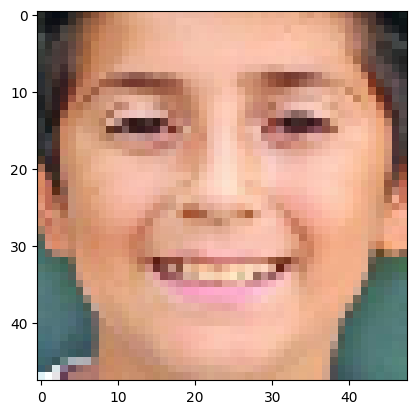

In [6]:
plt.imshow(images[101])

In [7]:
print(ages[101])

10


In [8]:
print(genders[101])       #0=Male and 1=Female

0


#Saving images array, ages array and genders array in the system

In [9]:
images_f = np.array(images)
ages_f = np.array(ages) 
genders_f = np.array(genders)


In [10]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

Finding the no. of Male and Females samples respectively

In [11]:
values, counts= np.unique(genders_f, return_counts=True)
print(counts)
print(values)

[12391 11317]
[0 1]


Plotting the No. of Male and Female Samples

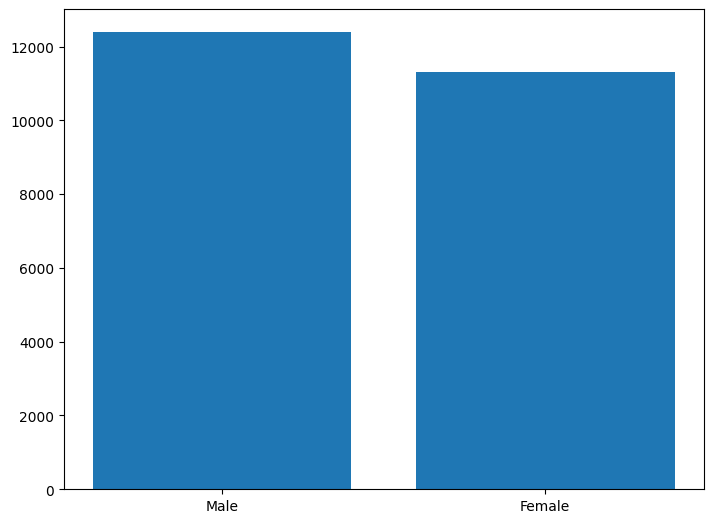

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male','Female']
values = [12391, 11317]
ax.bar(gender, values)
plt.show()

Finding the no. of samples in each age

In [13]:
values, counts= np.unique(ages_f, return_counts=True)
print(counts)
print(values)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  95  96  99 100 101 103 105 110 111 115 116]


Converting Age counts to lists

In [14]:
val = values.tolist()
cnt = counts.tolist()


Plotting the Samples Agewise

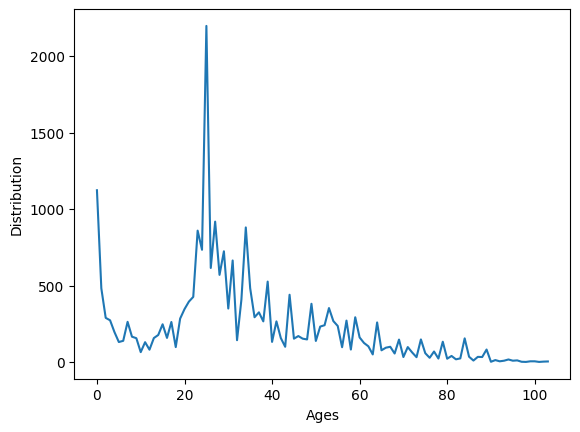

In [15]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()


**Defining Labels for Output**

In [16]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

Creating another list of images from existing one

In [17]:
images_f_2=images_f/255 

In [18]:
images_f_2.shape

(23708, 48, 48, 3)

In [19]:
labels_f=np.array(labels)

Splitting The Dataset into test and train¶

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [22]:
X_test[0]

array([[[0.58431373, 0.34901961, 0.25490196],
        [0.61960784, 0.38431373, 0.29019608],
        [0.62352941, 0.38823529, 0.29411765],
        ...,
        [0.5254902 , 0.34117647, 0.25882353],
        [0.55686275, 0.34509804, 0.25098039],
        [0.58431373, 0.36470588, 0.26666667]],

       [[0.55294118, 0.3254902 , 0.23921569],
        [0.57647059, 0.34901961, 0.2627451 ],
        [0.58431373, 0.35686275, 0.27058824],
        ...,
        [0.54117647, 0.32941176, 0.23137255],
        [0.54509804, 0.34901961, 0.25490196],
        [0.56862745, 0.36078431, 0.26666667]],

       [[0.55294118, 0.32941176, 0.25490196],
        [0.56862745, 0.34509804, 0.27058824],
        [0.53333333, 0.30980392, 0.23529412],
        ...,
        [0.52941176, 0.3254902 , 0.23137255],
        [0.52156863, 0.34117647, 0.25098039],
        [0.54901961, 0.36078431, 0.27058824]],

       ...,

       [[0.81568627, 0.74901961, 0.72156863],
        [0.78431373, 0.71372549, 0.69019608],
        [0.84705882, 0

In [23]:
Y_train[0:5]

array([[40,  1],
       [28,  0],
       [ 5,  1],
       [25,  1],
       [52,  0]])

Splitting 'Y_test' and 'Y_train' further

In [24]:
Y_train_2=[Y_train[:, 1], Y_train[:,0]]
Y_test_2=[Y_test[:, 1], Y_test[:,0]]

In [25]:
Y_train_2[0][0:5]

array([1, 0, 1, 1, 0])

In [26]:
Y_train_2[1][0:5]

array([40, 28,  5, 25, 52])

Defining the Model

In [27]:
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)       
    x=Activation('relu')(x)
    return x

In [28]:
def build_model(input_shape):
    inputs=Input(shape=(input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    flatten= Flatten()(maxp_4)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2=Dense(1,activation='relu',name='age_out')(drop_2)
    model=Model(inputs=inputs,outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=[['accuracy'],['accuracy']])
    return model

In [29]:
input_shape = (48, 48, 3)
model_instance = build_model(input_shape)

In [30]:
model_instance.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 48, 48,    │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 48, 48,    │          0 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 48, 48,    │          0 │ dropout[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 24, 24,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 24, 24,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 24, 24,    │          0 │ conv2d_1[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 24, 24,    │          0 │ dropout_1[0][0]   │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 12, 12,    │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 12, 12,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 12, 12,    │          0 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 12, 12,    │          0 │ dropout_2[0][0]   │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 6, 6, 128) │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 6, 6, 256) │    295,168 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 6, 6, 256) │          0 │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 6, 6, 256) │          0 │ dropout_3[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 3, 3, 256) │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 683,586 (2.61 MB)

 Trainable params: 683,586 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint

Initializing the Model

In [32]:
fle_s='Age_Sex_Detection.keras'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

In [33]:
print(callback_list)

[<keras.src.callbacks.model_checkpoint.ModelCheckpoint object at 0x000002BF9EA2A490>, <keras.src.callbacks.early_stopping.EarlyStopping object at 0x000002BF9EAD64D0>]


In [34]:
History=model_instance.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=150,callbacks=callback_list)

Epoch 1/150
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - age_out_accuracy: 0.0424 - loss: 19.9185 - sex_out_accuracy: 0.5460
Epoch 1: val_loss improved from inf to 17.37675, saving model to Age_Sex_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 49s 158ms/step - age_out_accuracy: 0.0424 - loss: 19.9097 - sex_out_accuracy: 0.5459 - val_age_out_accuracy: 0.0489 - val_loss: 17.3768 - val_sex_out_accuracy: 0.5261
Epoch 2/150
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - age_out_accuracy: 0.0467 - loss: 15.3109 - sex_out_accuracy: 0.5465
Epoch 2: val_loss improved from 17.37675 to 12.98119, saving model to Age_Sex_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 40s 143ms/step - age_out_accuracy: 0.0467 - loss: 15.3083 - sex_out_accuracy: 0.5467 - val_age_out_accuracy: 0.0489 - val_loss: 12.9812 - val_sex_out_accuracy: 0.6867
Epoch 3/150
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - age_out_accuracy: 0.0443 - loss: 12.2150 - sex_out_accuracy: 0.7062
Epoch 3: val_loss improved from 12.98119 to 11.729

Model Evaluation

In [35]:
model_instance.evaluate(X_test,Y_test_2)

186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - age_out_accuracy: 0.0485 - loss: 7.4256 - sex_out_accuracy: 0.8772


[7.514969348907471, 0.0489286333322525, 0.872954249382019]

In [36]:
pred=model_instance.predict(X_test)

186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step


In [37]:
pred[1]

array([[59.22629  ],
       [ 4.4039793],
       [37.01506  ],
       ...,
       [29.141577 ],
       [28.067585 ],
       [28.058348 ]], dtype=float32)

Plotting Loss

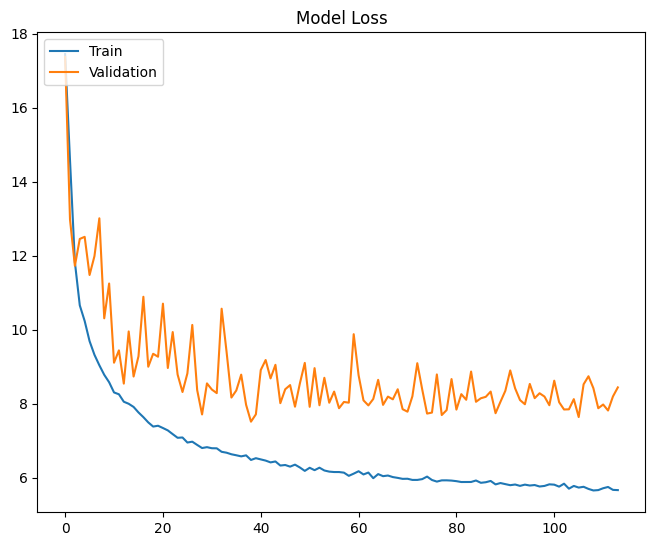

In [38]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)


Plotting Sex Accuracy

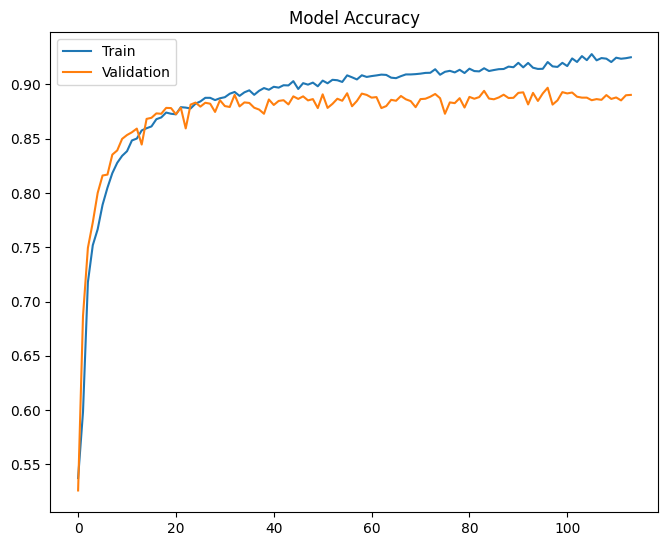

In [39]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

Plotting Gender Accuracy

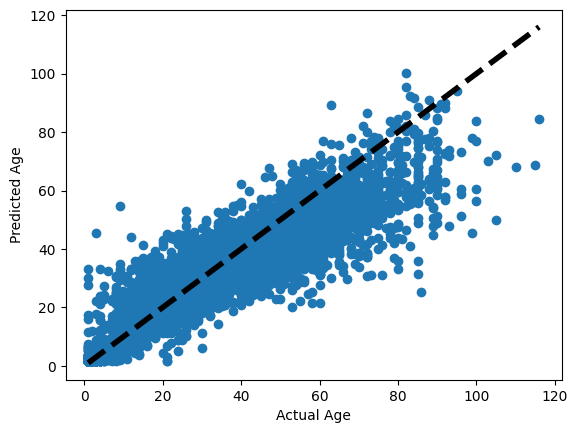

In [40]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

Making Report of the Model (Gender Only)

In [41]:
i=0
Pred_l=[]
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1

C:\Users\HP\AppData\Local\Temp\ipykernel_6100\4197083195.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Pred_l.append(int(np.round(pred[0][i])))


In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [43]:
report=classification_report(Y_test_2[0],Pred_l)

In [44]:
print(report)

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      3118
           1       0.81      0.95      0.88      2809

    accuracy                           0.87      5927
   macro avg       0.88      0.88      0.87      5927
weighted avg       0.88      0.87      0.87      5927



Making Heatmap of the Model (Gender only)

In [45]:
results=confusion_matrix(Y_test_2[0],Pred_l)

<Axes: >

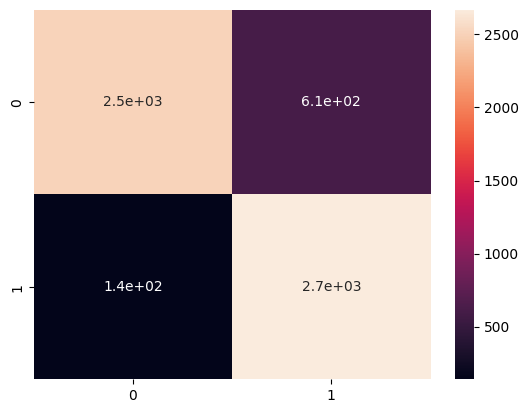

In [46]:
import seaborn as sns
sns.heatmap(results,annot=True)

Testing The Images Ourself

In [47]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_l=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print("Predicted Age is "+ str(age))
    print("Predicted Gender is "+ sex_f[sex])
    

Test 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Age is 86
Predicted Gender is Female


C:\Users\HP\AppData\Local\Temp\ipykernel_6100\1423547029.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\HP\AppData\Local\Temp\ipykernel_6100\1423547029.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


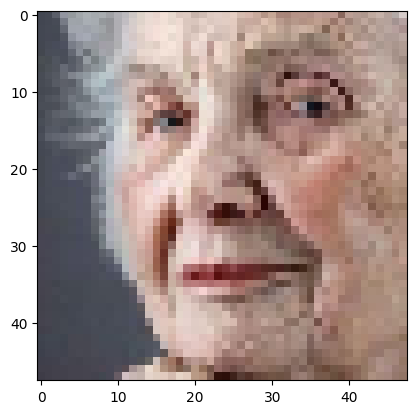

In [48]:
test_image(4,images_f,images_f_2,model_instance)

Test 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Age is 7
Predicted Gender is Female


C:\Users\HP\AppData\Local\Temp\ipykernel_6100\1423547029.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\HP\AppData\Local\Temp\ipykernel_6100\1423547029.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


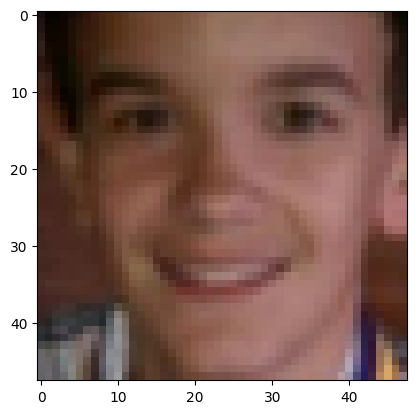

In [49]:
test_image(23,images_f,images_f_2,model_instance)

Test 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


C:\Users\HP\AppData\Local\Temp\ipykernel_6100\1423547029.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\HP\AppData\Local\Temp\ipykernel_6100\1423547029.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


Predicted Age is 11
Predicted Gender is Female


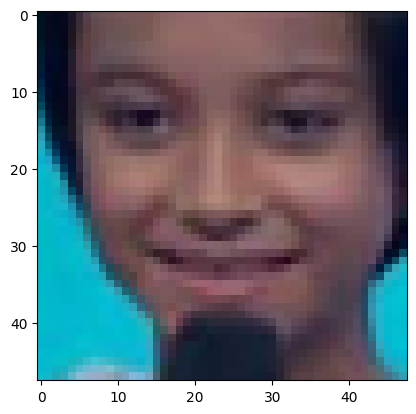

In [50]:
test_image(168,images_f,images_f_2,model_instance)

Test 4

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


C:\Users\HP\AppData\Local\Temp\ipykernel_6100\1423547029.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\HP\AppData\Local\Temp\ipykernel_6100\1423547029.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


Predicted Age is 22
Predicted Gender is Male


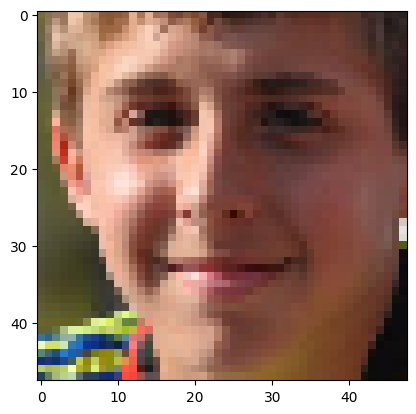

In [51]:
test_image(888,images_f,images_f_2,model_instance)

Test 5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Age is 25
Predicted Gender is Female


C:\Users\HP\AppData\Local\Temp\ipykernel_6100\1423547029.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\HP\AppData\Local\Temp\ipykernel_6100\1423547029.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


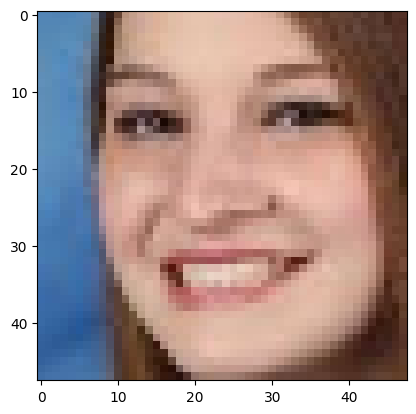

In [52]:
test_image(1288,images_f,images_f_2,model_instance)